#### Source: [pyimagesearch](https://www.pyimagesearch.com/2017/12/11/image-classification-with-keras-and-deep-learning/)

In [2]:
print('acb')

acb


In [19]:
import warnings
warnings.filterwarnings('ignore')
import keras
import glob
from tqdm import tqdm
import os
import cv2
import numpy as np
from keras.preprocessing.image import load_img, img_to_array

In [4]:
# ['filename','leter',code]
list_dataset_items = [
	["no_0_", 0, "۰"],
    ["no_1_", 1, "۱"],
    ["no_2_", 2, "۲"],
    ["no_3_", 3, "۳"],
    ["no_4_", 4, "۴"],
    ["no_5_", 5, "۵"],
    ["no_6_", 6, "۶"],
    ["no_7_", 7, "۷"],
    ["no_8_", 8, "۸"],
    ["no_9_", 9, "۹"],
    ["al_al_", 10, "ا"],
    ["al_be_", 11, "ب"],
    ["al_pe_", 12, "پ"],
    ["al_te_", 13, "ت"],
    ["al_sn_", 14, "ث"],
    ["al_jm_", 15, "ج"],
    ["al_ch_", 16, "چ"],
    ["al_hh_", 17, "ح"],
    ["al_kh_", 18, "خ"],
    ["al_dl_", 19, "د"],
    ["al_zl_", 20, "ذ"],
    ["al_rr_", 21, "ر"],
    ["al_zz_", 22, "ز"],
    ["al_jz_", 23, "ژ"],
    ["al_sn_", 24, "س"],
    ["al_shn_", 25, "ش"],
    ["al_sd_", 26, "ص"],
    ["al_zd_", 27, "ض"],
    ["al_ta_", 28, "ط"],
    ["al_za_", 29, "ظ"],
    ["al_ay_", 30, "ع"],
    ["al_ghy_", 31, "غ"],
    ["al_fe_", 32, "ف"],
    ["al_gh_", 33, "ق"],
    ["al_kf_", 34, "ک"],
    ["al_gf_", 35, "گ"],
    ["al_lm_", 36, "ل"],
    ["al_mm_", 37, "م"],
    ["al_nn_", 38, "ن"],
    ["al_vv_", 39, "و"],
    ["al_he_", 40, "ه"],
    ["al_ye_", 41, "ی"]
]
list_dataset_items = np.array(list_dataset_items)


def get_char_ds(filename):
    for row in list_dataset_items:
        # print(row[0], type(row[0]))
        # print(filename, type(filename))
        if row[0] in filename:
            # print((row[1] , row[2]))
            return (row[1] , row[2])
    # print(filename)
    return "X"
def is_digit(code):
    return code < 10

In [5]:
print(get_char_ds("dataset/processed/al_al_0_0.jpg"))
print(is_digit(10))

('10', 'ا')
False


In [7]:
num_classes = 10
EPOCHS = 30
BS = 32
print(num_classes, EPOCHS, BS)

10 30 32


In [8]:
train_dirs = glob.glob("dataset/processed/*")
train_dirs.sort()
# train_dirs = train_dirs[:num_classes]

data = []
labels = []
# for train_dir in tqdm(train_dirs):
# imgPaths = glob.glob(train_dir + "/*.png")
imgPaths = train_dirs
imgPaths.sort()
for imgPath in tqdm(imgPaths):
  code, label = get_char_ds(imgPath)
  code = int(code)
  if(not is_digit(code)):
    continue
  
  image = load_img(imgPath, target_size=(28, 28), grayscale=True)
  image = img_to_array(image) 
  data.append(image)

  # label = imgPath.split(os.path.sep)[-2]
  code, label = get_char_ds(imgPath)
  labels.append(int(code))

100%|██████████| 6484/6484 [00:01<00:00, 5129.51it/s] 


In [17]:
print(len(data), len(labels))
print(set(labels))
for l in set(labels):
    print(l, np.count_nonzero(labels == l))

1276 1276
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
0 118
1 118
2 118
3 118
4 118
5 118
6 166
7 166
8 118
9 118


In [10]:
data = np.array(data, dtype=np.float) / 255.
labels = np.array(labels)

In [11]:
from sklearn.model_selection import train_test_split
train_input, valid_input, train_target, valid_target = train_test_split(data,
                                                                        labels,
                                                                        test_size=0.25,
                                                                        random_state=123)

In [12]:
from keras.utils import to_categorical
train_target = to_categorical(train_target, num_classes=num_classes)
valid_target = to_categorical(valid_target, num_classes=num_classes)

In [13]:
from keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(rotation_range=15, width_shift_range=0.1, height_shift_range=0.1)

##### LeNet modified architecture:
![LeNet_architecture.png](attachment:LeNet_architecture.png)

In [14]:
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from keras.models import Model
def build_model(inputs):
  x = inputs

  x = Conv2D(filters=20, kernel_size=(5, 5), padding="same", activation="relu")(x)
  x = MaxPool2D(pool_size=(2, 2), strides=(2, 2))(x)

  x = Conv2D(filters=50, kernel_size=(5, 5), padding="same", activation="relu")(x)
  x = MaxPool2D(pool_size=(2, 2), strides=(2, 2))(x) 

  x = Flatten()(x)
  x = Dense(500, activation="relu")(x)
  outputs = Dense(num_classes, activation="softmax")(x)

  model = Model(inputs, outputs, name="LeNet")
  model.summary()
  
  return model
print("DONE")

DONE


 ![Pyimagesearch_poll.png](attachment:Pyimagesearch_poll.png)  
![Pyimagesearch_answer.png](attachment:Pyimagesearch_answer.png) 

While the word “augment” means to make something “greater” or “increase” something (in this case, data), the Keras ImageDataGenerator class actually works by:
1.  Accepting a batch of images used for training.
2.  Taking this batch and applying a series of random transformations to each image in the batch (including random rotation, resizing, shearing, etc.).
3.  **Replacing the original batch with the new, randomly transformed batch.**
4.  Training the CNN on this randomly transformed batch (i.e., the original data itself is not used for training).

#### Important links:
[keras data augmentation doc](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html)  
[Data augmentation explanation](https://www.pyimagesearch.com/2019/07/08/keras-imagedatagenerator-and-data-augmentation/)   
[fit_generator()](https://www.pyimagesearch.com/2018/12/24/how-to-use-keras-fit-and-fit_generator-a-hands-on-tutorial/)

In [15]:
from keras.layers import Input
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

input = Input((28, 28, 1))
model = build_model(input)

opt = Adam()
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["acc"])

checkpoint = ModelCheckpoint(filepath="model.h5",
                             monitor="val_acc",
                             verbose=1,
                             save_best_only=True)
training_log = model.fit_generator(aug.flow(train_input, train_target, batch_size=BS),
                        steps_per_epoch=len(train_input) // BS,
                        validation_data=[valid_input, valid_target],
                        epochs=EPOCHS,
                        callbacks=[checkpoint])

Model: "LeNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 20)        520       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 50)        25050     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2450)              0         
_________________________________________________________________
dense (Dense)                (None, 500)               122550

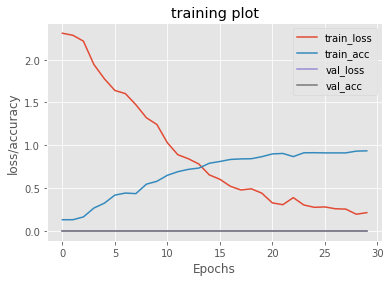

In [21]:
from matplotlib import pyplot as plt
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(EPOCHS), training_log.history["loss"], label="train_loss")
plt.plot(np.arange(EPOCHS), training_log.history["acc"], label="train_acc")
plt.plot(np.arange(EPOCHS), training_log.history["val_loss"], label="val_loss")
plt.plot(np.arange(EPOCHS), training_log.history["val_acc"], label="val_acc")
plt.xlabel("Epochs")
plt.ylabel("loss/accuracy")
plt.title("training plot")
plt.legend(loc="middle right")
plt.savefig("training_plot.png")

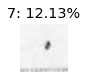

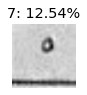

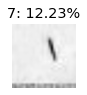

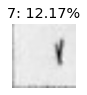

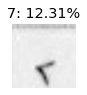

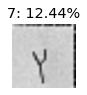

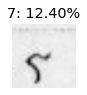

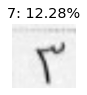

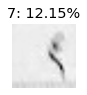

ValueError: num must be 1 <= num <= 9, not 10

<Figure size 432x288 with 0 Axes>

In [22]:
model.load_weights("model.h5")
testPaths = glob.glob("dataset/test/*.jpg")
testPaths.sort()
plt.figure(figsize=(3, 3))
for i, testPath in enumerate(testPaths):
    # print(i,testPath)
    image = load_img(testPath, target_size=(28, 28), grayscale=True)
    image = img_to_array(image) / 255.
    orig_img = image.copy()
    image = np.expand_dims(image, 0)
    predictions = model.predict(image)[0]
    label = np.argmax(predictions)
    # print(predictions)
    proba = np.max(predictions)
    output = cv2.resize(orig_img, (400, 400))
    plt.subplot(3, 3, i + 1)
    plt.imshow(output, cmap="gray")
    plt.axis("off")
    plt.title("{}: {:.2f}%".format(label, proba * 100))
    plt.show()